This data is a simulation of data that would be gathered from the Large Hadron Collider (LHC). The LHC is a particle collider that works by accelerating particles along a 27km ring using electromagnets, with sets of particles going in opposite directions. The paths of the particles then intersect at the various detectors, including ATLAS, where they collide and break into smaller particles. As the particles being searched for, such as the Higgs Boson, decay quickly, they are not observed directly but rather their decay products. As they decay, they create jets of many smaller particles that split off from each other. The detectors measure the tracks the jets travel as they pass through the layers of the detector, with each layer designed for different kinds of particles. By determining which detections are clustered together with which jets, and which jets are associated with the same original particles, the properties of the original particles can be determined.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson, norm
import scipy.stats as stats

In [2]:
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
bkg = pickle.load(infile)
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(infile)

In [3]:
bkg.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788


In [4]:
signal.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097


According to the documentation, for the high pT range, we expect the number of background events to be $N_{qcd} = 2000$ and the number of signal events to be $N_{higgs} = 50$. This means our background should be a Poisson distribution with a mean of 2000, and the significance will be calculated as a count of $N_{qcd}+N_{higgs} = 2050$ events.

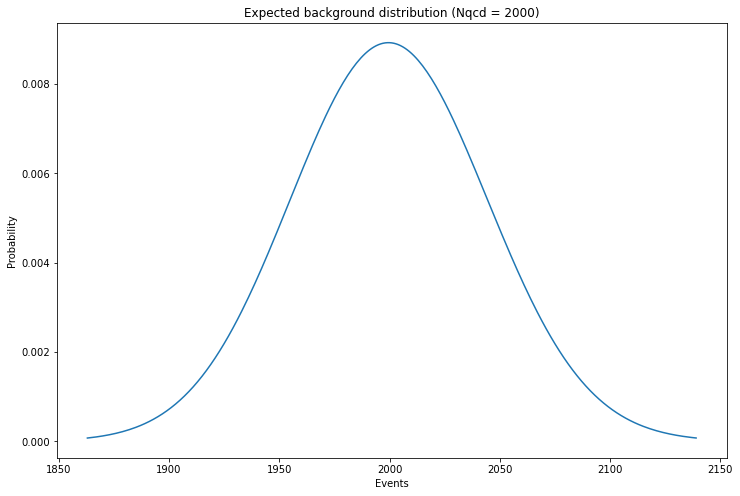

In [5]:
mu = 2000
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.999, mu))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,poisson.pmf(x, mu))
plt.title('Expected background distribution (Nqcd = 2000)')
plt.xlabel('Events')
plt.ylabel('Probability')
plt.show()

In [6]:
p = poisson.sf(2050,mu)
sig = abs(norm.ppf(p))
print(f'The probability of finding 2050 events in the background is {p:0.3f}, which is a signficants of {sig:0.3f}.')

The probability of finding 2050 events in the background is 0.130, which is a signficants of 1.128.


The significance for this signal is only $1.128\sigma$, which is extremely far below the $5\sigma$ discovery threshold.

To narrow down range we are looking at to get a better significance, we can plot all of the different features of the background and the signal to see if there are any features that can be used to distinguish them.

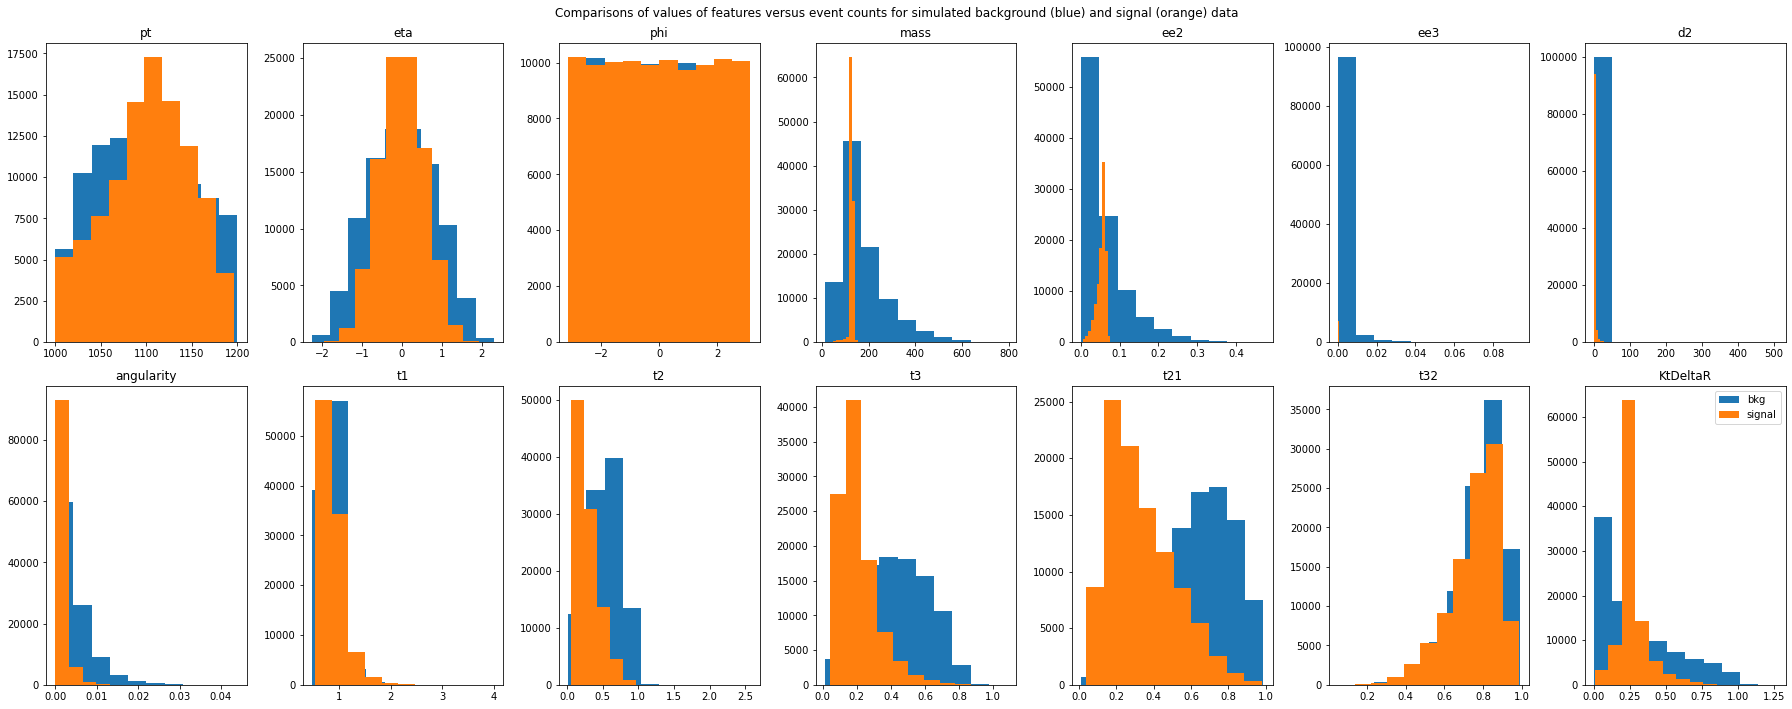

In [21]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist(bkg[column1], label='bkg')
    ax[1,i].hist(bkg[column2], label='bkg')
    ax[0,i].hist(signal[column1], label='signal')
    ax[1,i].hist(signal[column2], label='signal')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparisons of values of features versus event counts for simulated background (blue) and signal (orange) data')
plt.legend()
plt.tight_layout()

Looking at these, we can see that the distribution for the signal is much narrower for some parameters. It would appear that a good choice could be to narrow down based on mass, as they have very similar mean values, but the mass range on the signal is much more narrow. Since signal can only be found in that narrow range of masses, we can cut out all of the background outside of that range.

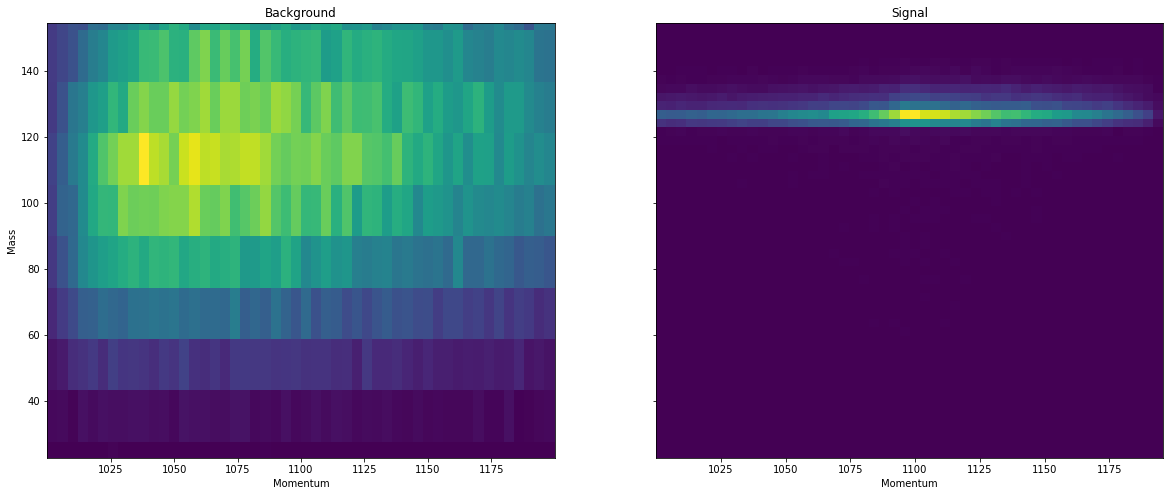

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,8),sharey=True)
ax[0].hist2d(bkg['pt'], bkg['mass'], bins=50)
ax[1].hist2d(signal['pt'], signal['mass'], bins=50)

ax[0].set_xlabel('Momentum')
ax[0].set_ylabel('Mass')
ax[0].set_title('Background')
ax[1].set_title('Signal')
ax[1].set_xlabel('Momentum')
plt.show()

In [9]:
cut_bkg = bkg[(bkg['mass']>120) &  (bkg['mass'] < 140)]
cut_signal = signal[(signal['mass']>120) &  (signal['mass'] < 140)]
len(cut_bkg), len(cut_signal)
n_bkg = len(cut_bkg)

n_signal = 50/2000 * n_bkg

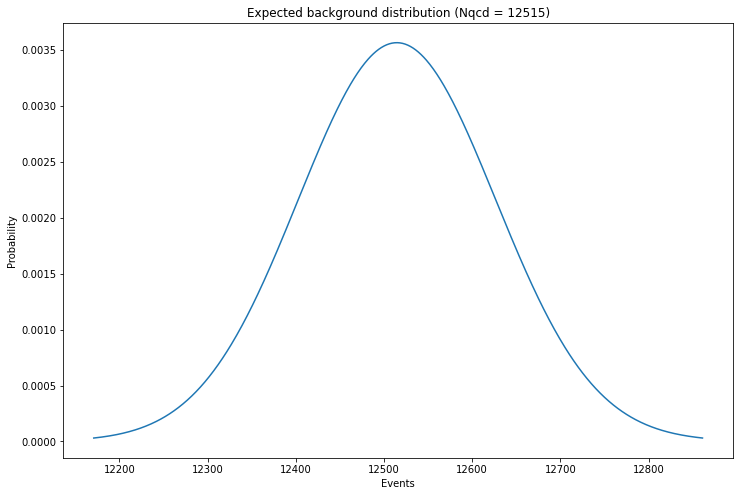

In [10]:
mu = n_bkg
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.999, mu))
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(x,poisson.pmf(x, mu))
plt.title(f'Expected background distribution (Nqcd = {n_bkg})')
plt.xlabel('Events')
plt.ylabel('Probability')
plt.show()

In [11]:
p = poisson.sf(n_bkg+n_signal,mu)
sig = abs(norm.ppf(p))
print(f'The probability of finding {n_bkg+n_signal:0.0f} events in the background is {p:0.3e}, which is a signficance of {sig:0.3f}.')

The probability of finding 12828 events in the background is 2.690e-03, which is a signficance of 2.783.


This is still not high enough for a confirmed signal, but is significantly better than the previous value. To improve this further, we could narrow down by other parameters. We can rule out some, such a pt, eta, and phi, where the distributions are very similar.